<a href="https://colab.research.google.com/github/Mia-Coutts/Data-Science-Portfolio-Class/blob/main/Data_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About This Project

Hi! My name is Mia Coutts and I’m a Data Science major at Belmont University graduating in May 2024. This is my semester research project for my DSC 4900 Data Science Project/Portfolio course.
This project analyzes Massachusetts Public School data from 2017, with a specific interest in predicting SAT scores.

# Import Packages

In [97]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy
from scipy import stats
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Data Organization

In [69]:
import pandas as pd
#get MA school data from github
url_data = (r'https://raw.githubusercontent.com/Mia-Coutts/Data-Science-Portfolio-Class/main/MA_Public_Schools_2017.csv')
#define dataset
MAdf = pd.read_csv(url_data)

In [15]:
#rename dataframe
MAdfAll = MAdf
#data frame with names and reduced variables
MAdfRNames = MAdfAll[['School Name', 'School Type', 'Town', 'Zip','Address 1','% Attending College','% High Needs', '% Economically Disadvantaged','% Females','% Graduated','% AP_Score 3-5', 'Average SAT_Reading', 'Average SAT_Writing', 'Average SAT_Math', 'School Accountability Percentile (1-99)', '% Dropped Out','Progress and Performance Index (PPI) - All Students']]
#reduced data frame
MAdfR = MAdfAll[['% Attending College','% High Needs', '% Economically Disadvantaged','% Females','% Graduated','% AP_Score 3-5', 'Average SAT_Reading', 'Average SAT_Writing', 'Average SAT_Math', 'School Accountability Percentile (1-99)', '% Dropped Out','Progress and Performance Index (PPI) - All Students']]
#reduced with town
MAdfRT = MAdfAll[['Town','School Name','% Attending College','% High Needs', '% Economically Disadvantaged','% Females','% Graduated','% AP_Score 3-5', 'Average SAT_Reading', 'Average SAT_Writing', 'Average SAT_Math', 'School Accountability Percentile (1-99)', '% Dropped Out','Progress and Performance Index (PPI) - All Students']]
#drop all Nan
MAdfR = MAdfR.dropna()
MAdfRT = MAdfRT.dropna()
MAdfRNames1 = MAdfRNames.dropna()

In [16]:
#change variable name
MAdfR.rename(columns={'School Accountability Percentile (1-99)': 'SAP'}, inplace=True)
MAdfRT.rename(columns={'School Accountability Percentile (1-99)': 'SAP'}, inplace=True)

In [17]:
#make SAT as one variable
MAdfR['Average SAT'] = MAdfR[['Average SAT_Reading',	'Average SAT_Writing','Average SAT_Math']].mean(axis=1)
MAdfRT['Average SAT'] = MAdfRT[['Average SAT_Reading',	'Average SAT_Writing','Average SAT_Math']].mean(axis=1)
#total SAT score
MAdfR['Total SAT Score'] = MAdfR['Average SAT']+MAdfR['Average SAT']

In [18]:
MAdfRNames1['Average SAT'] = MAdfRNames1[['Average SAT_Reading','Average SAT_Writing','Average SAT_Math']].mean(axis=1)

<ipython-input-18-7ec52ac170d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAdfRNames1['Average SAT'] = MAdfRNames1[['Average SAT_Reading','Average SAT_Writing','Average SAT_Math']].mean(axis=1)


In [19]:
#drop other SAT variables
MAdfR = MAdfR.drop (['Average SAT_Reading',	'Average SAT_Writing','Average SAT_Math'],axis=1)
MAdfRT = MAdfRT.drop (['Average SAT_Reading',	'Average SAT_Writing','Average SAT_Math'],axis=1)

In [20]:
MAdfRNames1 = MAdfRNames1.drop (['Average SAT_Reading',	'Average SAT_Writing','Average SAT_Math'],axis=1)

In [21]:
#standardize data
MAdfRS = stats.zscore(MAdfR)

In [22]:
#data frame with new column named 'Above average'
MAdfRAboveAvg = MAdfR.copy()
MAdfRAboveAvg['Above Average SAT'] = [1 if x > 500 else 0 for x in MAdfRAboveAvg['Average SAT']]

#print the DataFrame
MAdfRAboveAvg

,% Attending College,% High Needs,% Economically Disadvantaged,% Females,% Graduated,% AP_Score 3-5,SAP,% Dropped Out,Progress and Performance Index (PPI) - All Students,Average SAT,Total SAT Score,Above Average SAT
0,75.8,28.8,21.5,54.4,94.7,56.1,42.0,3.5,76.0,511.333333,1022.666667,1
8,81.6,32.0,22.7,48.0,94.2,66.4,41.0,3.7,65.0,495.000000,990.000000,0
16,72.6,25.9,14.6,46.5,93.9,81.0,53.0,1.2,67.0,527.666667,1055.333333,1
23,89.3,20.9,6.3,51.1,95.7,78.1,81.0,0.5,85.0,569.666667,1139.333333,1
33,85.0,20.7,10.3,50.9,98.1,86.1,73.0,1.3,79.0,583.000000,1166.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,75.2,58.9,43.9,45.5,84.4,47.5,19.0,6.3,63.0,468.333333,936.666667,0
1822,54.4,81.4,63.6,47.9,76.7,17.8,3.0,8.5,63.0,397.666667,795.333333,0
1826,60.6,75.9,58.6,47.1,76.4,35.9,23.0,6.5,75.0,448.333333,896.666667,0
1831,72.4,68.5,57.1,44.9,92.7,23.3,54.0,0.0,59.0,444.666667,889.333333,0


Some variable explanation:

School Accountability Percentile (SAP) = An accountability percentile between 1 and 99 is reported for most schools. This number is an indication of the school's overall performance relative to other schools that administer similar assessments, and is calculated using up to two years of data for all accountability indicators. The accountability system helps the state to direct resources and assistance.

High Needs = Percentage of students in a school who belong to one or more of the following groups: students with disabilities, current or former English learners, and/or low income students.

More details here: https://profiles.doe.mass.edu/help/data.aspx?section=general

# Correlation Matrix

<Axes: >

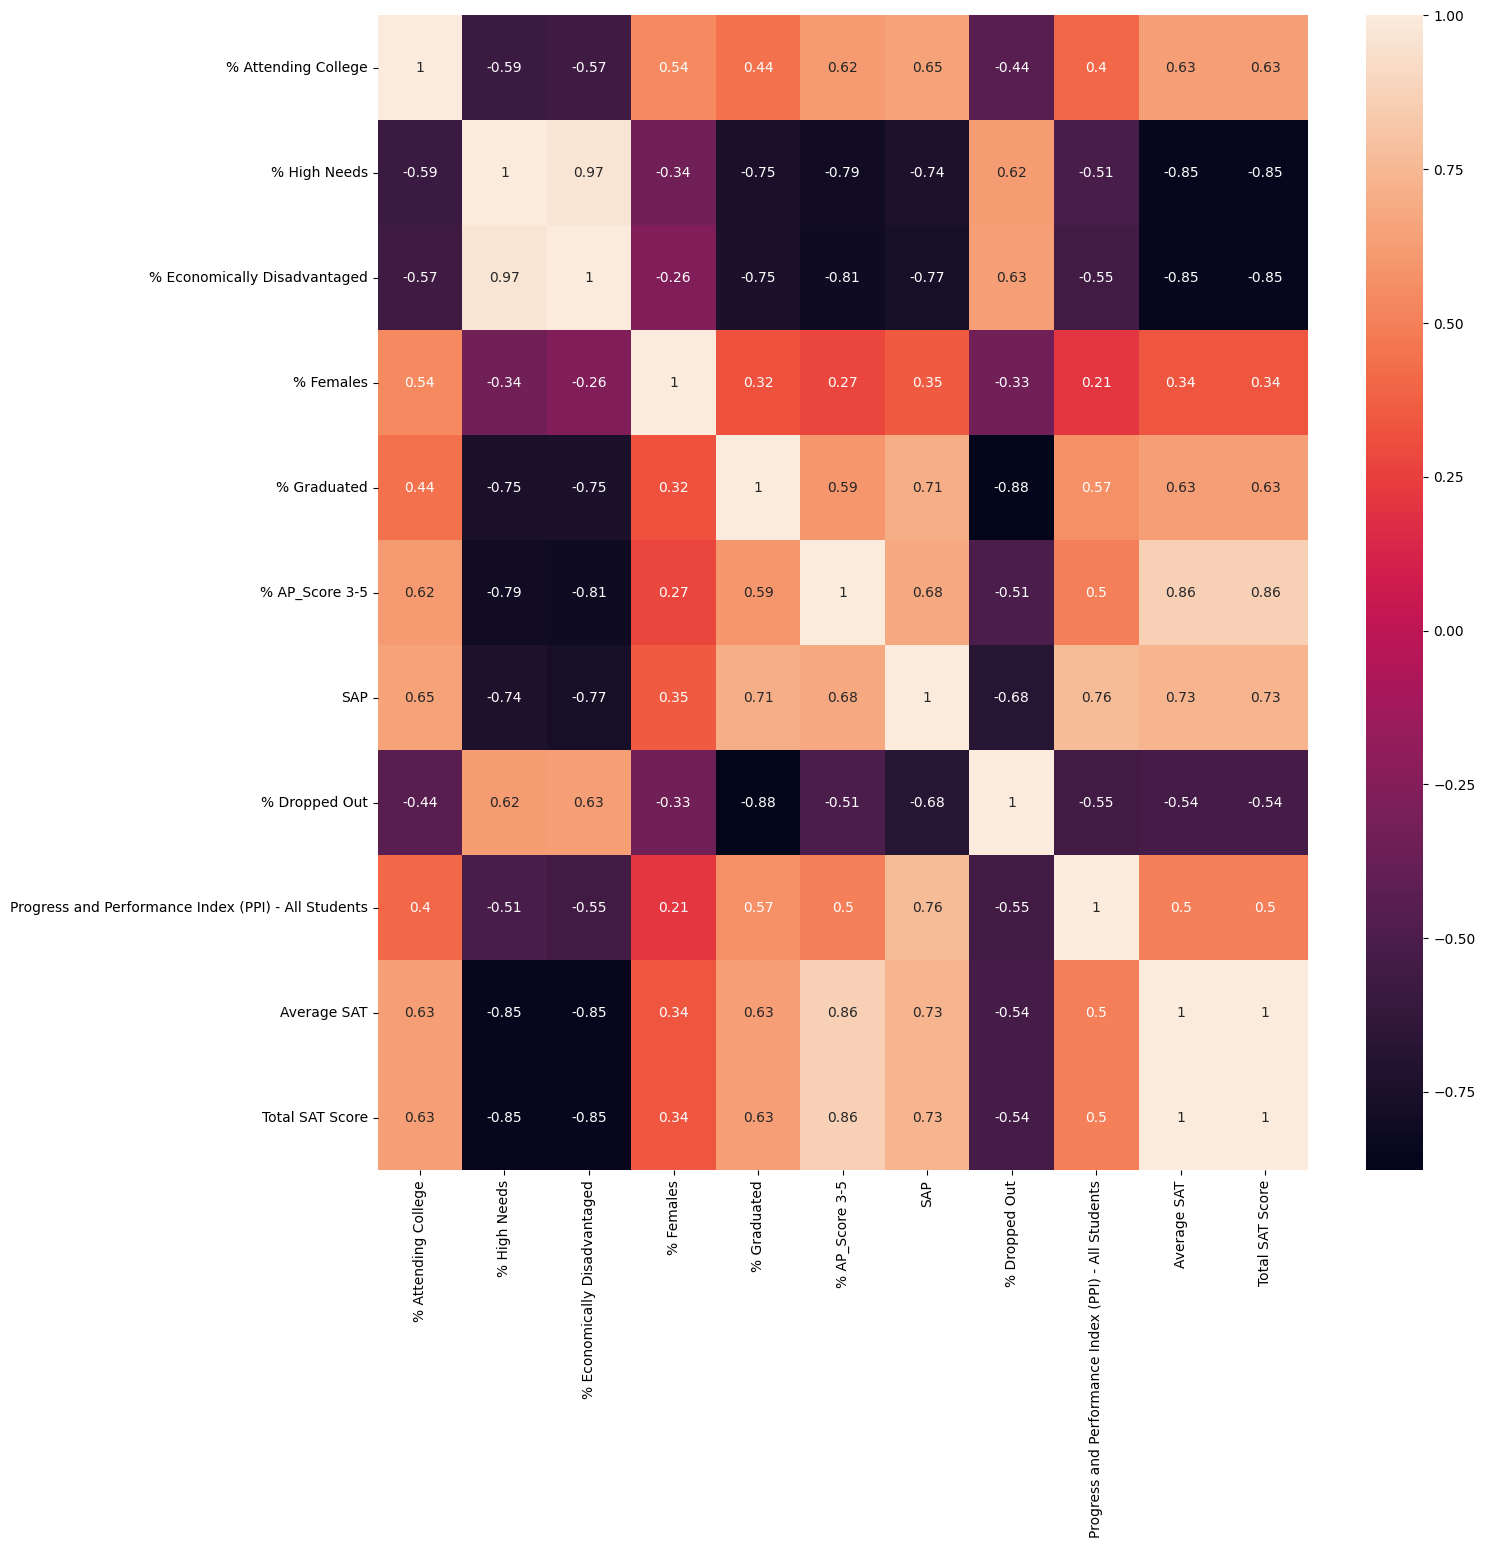

In [10]:
#correlation matrix
plt.figure(figsize = (15,15))
corrMatrix = MAdfRS.corr(method = 'pearson')
sns.heatmap(corrMatrix, annot=True)

In [52]:
#pearson r for correlation between SAT score and % High needs
from scipy import stats
scipy.stats.pearsonr(MAdfRS['Average SAT'], MAdfRS['% High Needs'])

PearsonRResult(statistic=-0.8513680956140856, pvalue=3.036582115415078e-83)

In [58]:
#just the pearson r value
scipy.stats.pearsonr(MAdfRS['Average SAT'], MAdfRS['% High Needs'])[0]

-0.8513680956140856

# Linear Regression Model

In [70]:
training_lin, testing_lin = train_test_split(MAdfRS, test_size=0.2, random_state=42)

In [73]:
#Linear regression model for SAT
predictors_sat = ['% High Needs']
outcome_sat = 'Average SAT'

sat_lin_model = LinearRegression()
sat_lin_model.fit(training_lin[predictors_sat], training_lin[outcome_sat])

print(f'y-intercept = {sat_lin_model.intercept_}')
print(f'slope = {sat_lin_model.coef_}')

#evaluate on testing data
print(f'r_sqr value: {sat_lin_model.score(testing_lin[predictors_sat], testing_lin[outcome_sat])}')

sat_pred_lin = sat_lin_model.predict(MAdfRS[predictors_sat])
MAdfRS["sat_pred_lin"] = sat_pred_lin

y-intercept = -0.02424024369080919
slope = [-0.86526973]
r_sqr value: 0.6942529263606751


In [72]:
#mean squared error
MSE_linear_sat = mean_squared_error(MAdfRS["Average SAT"], MAdfRS["sat_pred_lin"])
print(MSE_linear_sat)

0.27595321073937445


# Multiple Regression Model

In [76]:
#Multiple regression model for SAT
predictors_sat = ['% AP_Score 3-5','SAP','% High Needs']

outcome_sat = 'Average SAT'

sat_mult_model = LinearRegression()
sat_mult_model.fit(training_lin[predictors_sat], training_lin[outcome_sat])

print(f'y-intercept = {sat_mult_model.intercept_}')
print(f'slope = {sat_mult_model.coef_}')

#always evaluate on testing data
print(f'r_sqr value: {sat_mult_model.score(testing_lin[predictors_sat], testing_lin[outcome_sat])}')

sat_pred_mult = sat_mult_model.predict(MAdfRS[predictors_sat])
MAdfRS["sat_pred_mult"] = sat_pred_mult

y-intercept = -0.018313618909774745
slope = [ 0.48933046  0.09149156 -0.40124741]
r_sqr value: 0.8344935960790314


In [77]:
#predictors and their coeficients
predictors_sat, sat_mult_model.coef_

(['% AP_Score 3-5', 'SAP', '% High Needs'],
 array([ 0.48933046,  0.09149156, -0.40124741]))

Text(0.5, 1.0, 'Feature Importance from Linear Regression')

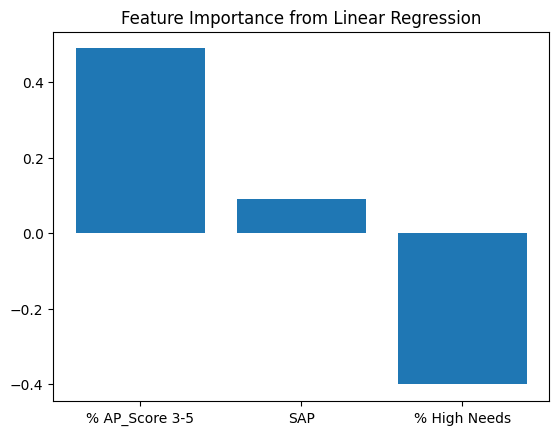

In [80]:
#feature importance plot
plt.bar(predictors_sat, sat_mult_model.coef_)
plt.title("Feature Importance from Linear Regression")

In [81]:
#mean squared error
MSE_multi_sat = mean_squared_error(MAdfRS["Average SAT"],MAdfRS["sat_pred_mult"])
print(MSE_multi_sat)

0.171803515540256


In [82]:
#prove that mutiple regression perforned better than lineat regression
MSE_multi_sat<MSE_linear_sat

True

In [83]:
#drop other prediction values variables
MAdfRS = MAdfRS.drop (['sat_pred_lin','sat_pred_mult'],axis=1)

# Logistic Regression

In [84]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [85]:
#logistic regression model
feature_cols = ['% AP_Score 3-5', 'SAP', '% High Needs']
X = MAdfRAboveAvg[feature_cols] # Features
y = MAdfRAboveAvg['Above Average SAT'] # Target variable

In [86]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [87]:
#run model
modelLog=LogisticRegression(random_state=1)
modelLog.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [88]:
#predictions
y_pred = modelLog.predict(X_test)

In [89]:
#accuracy score
modelLog.score(X_test, y_test)

0.8636363636363636

Text(0.5, 23.52222222222222, 'Predicted label')

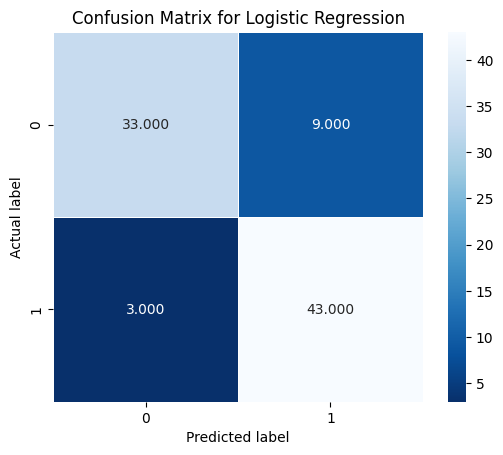

In [90]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
#feature importance
feature_importance = modelLog.coef_[0]
feature_cols,feature_importance

(['% AP_Score 3-5', 'SAP', '% High Needs'],
 array([ 0.05218997,  0.02021447, -0.11094906]))

Text(0.5, 1.0, 'Feature Importance from Logistic Regression')

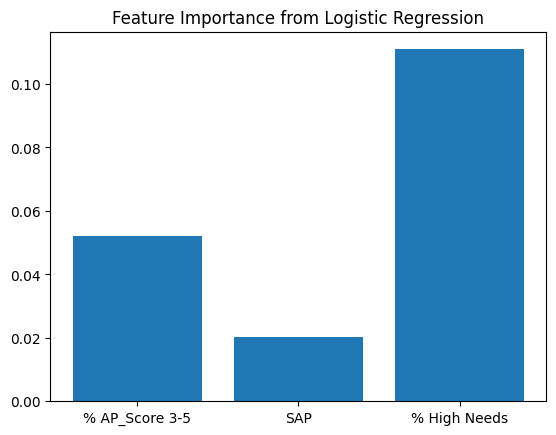

In [92]:
#plot feature importance
plt.bar(feature_cols, np.abs(feature_importance))
plt.title("Feature Importance from Logistic Regression")

# Decision Tree

In [37]:
#create feature variables and target variable for predicting SAT
feature_cols = ['% AP_Score 3-5', 'SAP', '% High Needs']
X = MAdfRAboveAvg[feature_cols] # Features
y = MAdfRAboveAvg['Above Average SAT'] # Target variable

In [43]:
#split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [45]:
#run decision tree classifier
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,y_train)

In [46]:
#predictions
y_pred = clf.predict(X_test)

In [47]:
#accuracy of predictions, use the true y's and the predicted y's
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8863636363636364


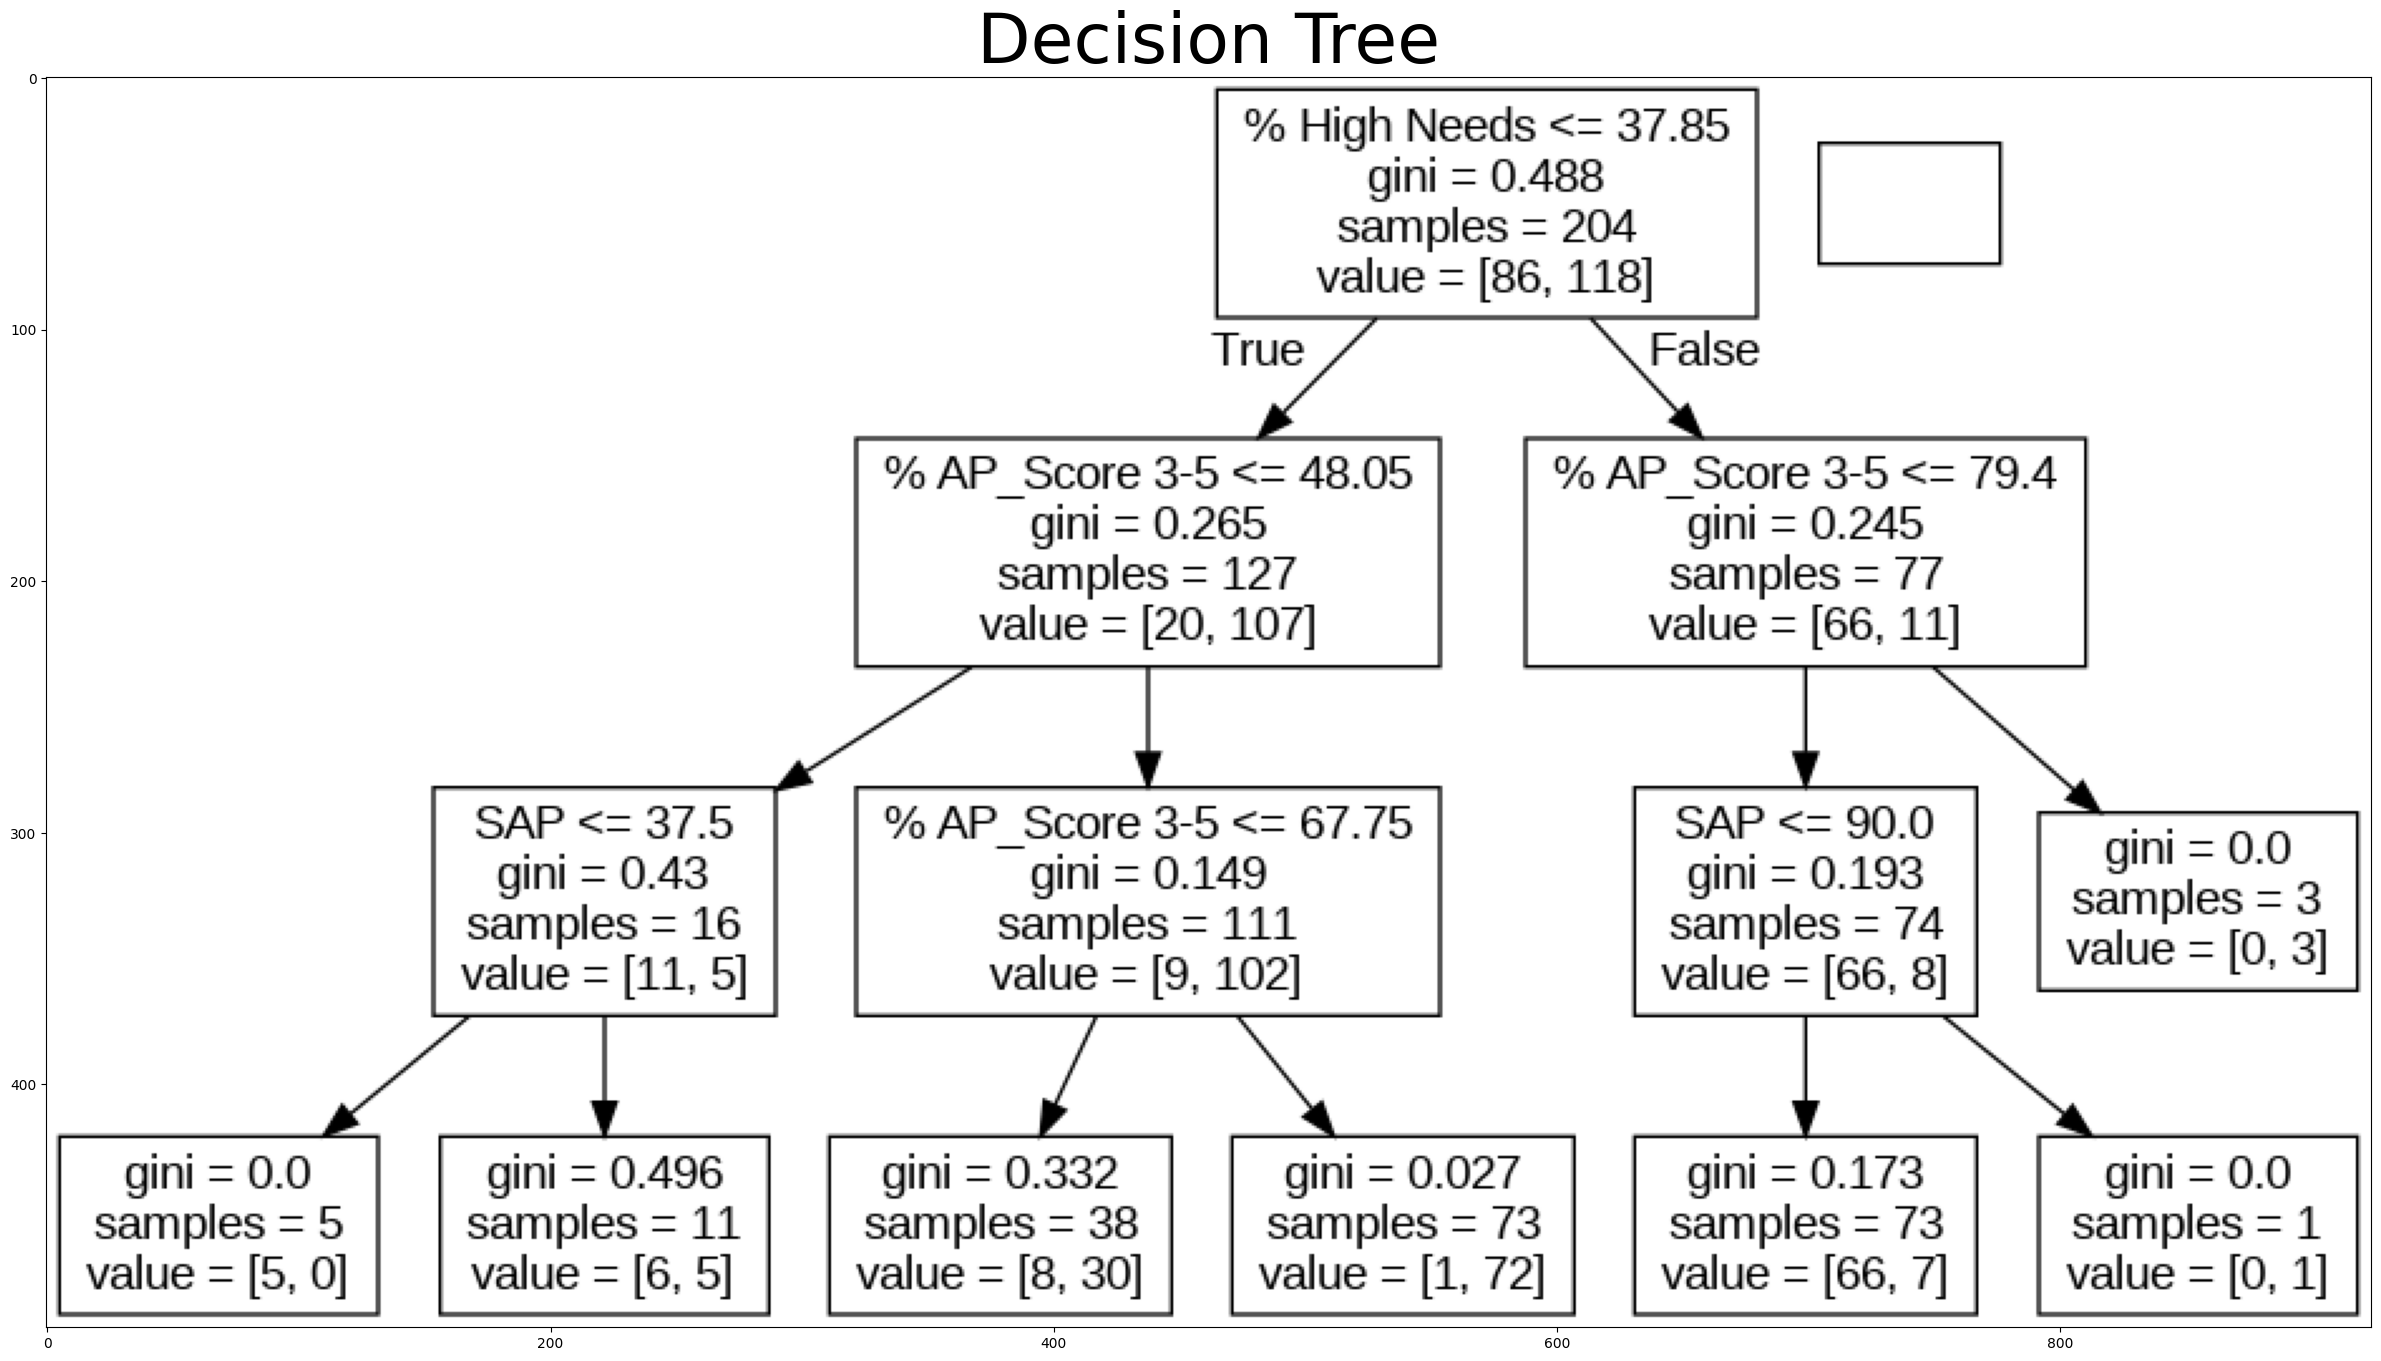

In [66]:
#plot decision treee
plt_2 = plt.figure(figsize=(30, 30))
data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.title("Decision Tree", fontsize = 50)
plt.show()

In [49]:
#feature importance
importance = clf.feature_importances_
feature_cols, importance

(['% AP_Score 3-5', 'SAP', '% High Needs'],
 array([0.25172215, 0.04542477, 0.70285308]))

Text(0.5, 1.0, 'Feature Importance for Decision Tree')

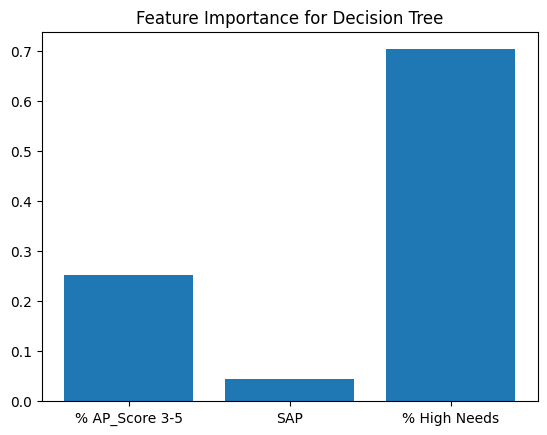

In [52]:
#plot feature importance
plt.bar(feature_cols, importance)
plt.title('Feature Importance for Decision Tree')

# Random Forest Model

In [53]:
#random forest model
feature_cols = ['% AP_Score 3-5', 'SAP', '% High Needs']
X = MAdfRAboveAvg[feature_cols] # Features
y = MAdfRAboveAvg['Above Average SAT'] # Target variable
feature_list = X.columns #list of variables

In [55]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [56]:
#import package to run random forest
from sklearn.ensemble import RandomForestClassifier

In [61]:
#run random forest classifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [62]:
#preditions
predictions = rf_model.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [63]:
#accuracy score of model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

0.8636363636363636

Text(0.5, 23.52222222222222, 'Predicted label')

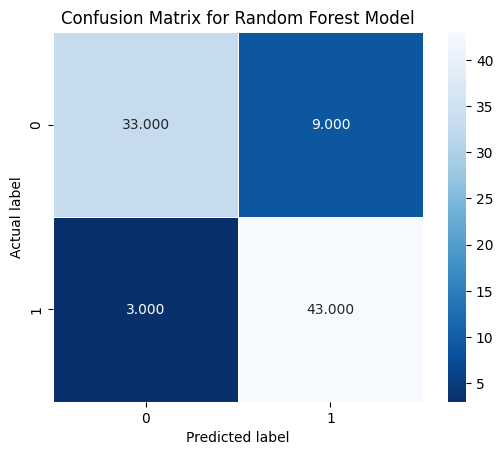

In [67]:
#confusion matrix to show models predicts vs actual values
conf = confusion_matrix(y_test, predictions)
sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
#feature importance
importances = rf_model.feature_importances_
feature_list, importances

(Index(['% AP_Score 3-5', 'SAP', '% High Needs'], dtype='object'),
 array([0.36851431, 0.30050897, 0.33097672]))

<BarContainer object of 3 artists>

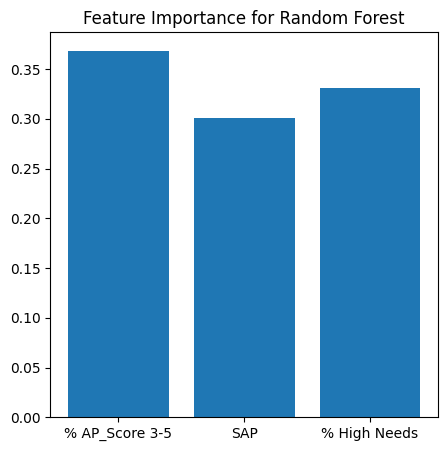

In [70]:
#plot feature importance
plt_2 = plt.figure(figsize=(5, 5))
plt.title('Feature Importance for Random Forest')
plt.bar(feature_list, importances)

# K Nearest Neighbor Model

In [25]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [29]:
#KNN model
feature_cols = ['% AP_Score 3-5', 'SAP', '% High Needs']
X = MAdfRAboveAvg[feature_cols] # Features
y = MAdfRAboveAvg['Above Average SAT'] # Target variable

In [30]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [31]:
#run KNN models with different k values
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn10 = KNeighborsClassifier(n_neighbors = 10)
knn15 = KNeighborsClassifier(n_neighbors = 15)
knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn4.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn10.fit(X_train, y_train)
knn15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [75]:
#predictions
y_pred_1 = knn1.predict(X_test)
y_pred_2 = knn2.predict(X_test)
y_pred_3 = knn3.predict(X_test)
y_pred_4 = knn4.predict(X_test)
y_pred_5 = knn5.predict(X_test)
y_pred_10 = knn10.predict(X_test)
y_pred_15 = knn15.predict(X_test)

In [76]:
#accuracy scores for the models
from sklearn.metrics import accuracy_score
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=4", accuracy_score(y_test, y_pred_4)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=10", accuracy_score(y_test, y_pred_10)*100)
print("Accuracy with k=15", accuracy_score(y_test, y_pred_15)*100)

Accuracy with k=1 85.22727272727273
Accuracy with k=2 89.77272727272727
Accuracy with k=3 85.22727272727273
Accuracy with k=4 86.36363636363636
Accuracy with k=5 85.22727272727273
Accuracy with k=10 86.36363636363636
Accuracy with k=15 86.36363636363636


In [77]:
#best KNN model was when k=2

Text(0.5, 23.52222222222222, 'Predicted label')

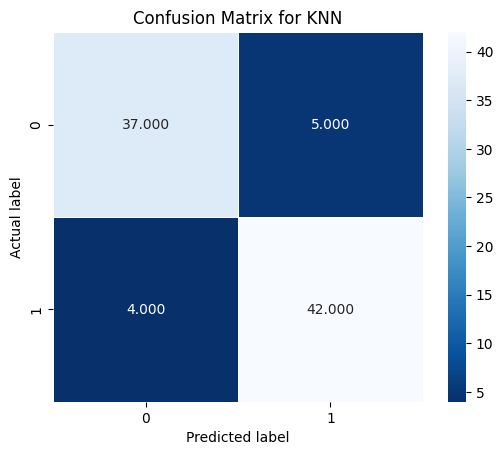

In [79]:
#confusion matrix for KNN k=2 model
conf = confusion_matrix(y_test, y_pred_2)
sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title('Confusion Matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Gradient Boosting Model

In [81]:
#import packages
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [82]:
#gradient boosting mode
feature_cols = ['% AP_Score 3-5', 'SAP', '% High Needs']
X = MAdfRAboveAvg[feature_cols] # Features
y = MAdfRAboveAvg['Above Average SAT'] # Target variable

In [83]:
#split into training and testing
test_size = 0.30 # taking 70:30 training and test set
seed = 7 # Random number seeding for repeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [84]:
#run model
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
#Gradient boosting classifiers are required to implement gradient boosting
gradient_booster.fit(X_train,y_train)
#The training dataset must now be used to fit the model; if the data is appropriately fitted, it will result in good accuracy.
print(classification_report(y_test,gradient_booster.predict(X_test)))
#Use the Python module named classification report to verify the correctness and quality of the accuracy report ().

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.84      0.92      0.88        53

    accuracy                           0.85        88
   macro avg       0.86      0.83      0.84        88
weighted avg       0.85      0.85      0.85        88



In [90]:
#predictions
y_pred = gradient_booster.predict(X_test)

In [85]:
#accuracy of the model is 85%

In [86]:
#feature importance
importances = gradient_booster.feature_importances_
feature_list, importances

(Index(['% AP_Score 3-5', 'SAP', '% High Needs'], dtype='object'),
 array([0.22422675, 0.09539896, 0.68037428]))

<BarContainer object of 3 artists>

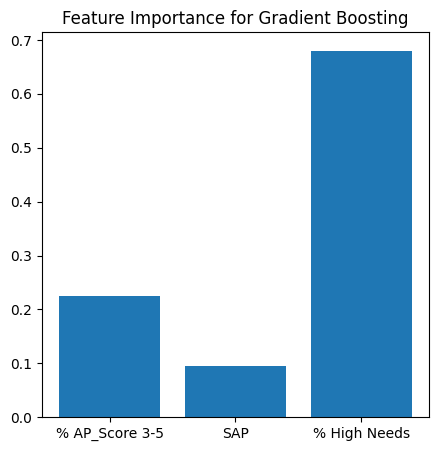

In [87]:
#plot feature importance
plt_2 = plt.figure(figsize=(5, 5))
plt.title('Feature Importance for Gradient Boosting')
plt.bar(feature_list, importances)

Text(0.5, 23.52222222222222, 'Predicted label')

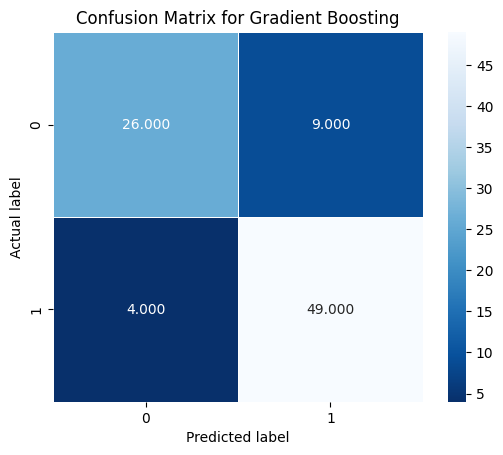

In [91]:
#confusion matrix
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title('Confusion Matrix for Gradient Boosting')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Comparing Models

In [93]:
#create table to compare models
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Accuracy", "Significant Feature(s)"])

# Add rows
myTable.add_row(["Linear", "R² = 0.7", "% High Needs"])
myTable.add_row(["Mutiple Regression", "R² = 0.8", "% AP Score 3-5 (0.49), SAP(0.1), % High Needs(-0.4)"])
myTable.add_row(["Logistic Regression", "86%", "% AP Score 3-5 (0.05), SAP(0.02), % High Needs(-0.11)"])
myTable.add_row(["Decision Tree", "89%", "% AP Score 3-5 (0.25), SAP(0.05), % High Needs(0.7, first node)"])
myTable.add_row(["Random Forest", "86%", "% AP Score 3-5 (0.37), SAP(0.3), % High Needs(0.33)"])
myTable.add_row(["KNN (k=2)", "90%", " "])
myTable.add_row(["Gradient Boosting", "85%", "% AP Score 3-5 (0.22), SAP(0.1), % High Needs(0.68)"])

print(myTable)

+---------------------+----------+-----------------------------------------------------------------+
|        Model        | Accuracy |                      Significant Feature(s)                     |
+---------------------+----------+-----------------------------------------------------------------+
|        Linear       | R² = 0.7 |                           % High Needs                          |
|  Mutiple Regression | R² = 0.8 |       % AP Score 3-5 (0.49), SAP(0.1), % High Needs(-0.4)       |
| Logistic Regression |   86%    |      % AP Score 3-5 (0.05), SAP(0.02), % High Needs(-0.11)      |
|    Decision Tree    |   89%    | % AP Score 3-5 (0.25), SAP(0.05), % High Needs(0.7, first node) |
|    Random Forest    |   86%    |       % AP Score 3-5 (0.37), SAP(0.3), % High Needs(0.33)       |
|      KNN (k=2)      |   90%    |                                                                 |
|  Gradient Boosting  |   85%    |       % AP Score 3-5 (0.22), SAP(0.1), % High Needs(0.68

In [94]:
#create table with just accuracy
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Accuracy"])

# Add rows
myTable.add_row(["Linear Regression", "R² = 0.7"])
myTable.add_row(["", ""])
myTable.add_row(["Mutiple Regression", "R² = 0.8"])
myTable.add_row(["", ""])
myTable.add_row(["Logistic Regression", "86%"])
myTable.add_row(["", ""])
myTable.add_row(["Decision Tree", "89%"])
myTable.add_row(["", ""])
myTable.add_row(["Random Forest", "86%"])
myTable.add_row(["", ""])
myTable.add_row(["K Nearest Neighbor (k=2)", "90%"])
myTable.add_row(["", ""])
myTable.add_row(["Gradient Boosting", "85%"])

print(myTable)

+--------------------------+----------+
|          Model           | Accuracy |
+--------------------------+----------+
|    Linear Regression     | R² = 0.7 |
|                          |          |
|    Mutiple Regression    | R² = 0.8 |
|                          |          |
|   Logistic Regression    |   86%    |
|                          |          |
|      Decision Tree       |   89%    |
|                          |          |
|      Random Forest       |   86%    |
|                          |          |
| K Nearest Neighbor (k=2) |   90%    |
|                          |          |
|    Gradient Boosting     |   85%    |
+--------------------------+----------+


In [96]:
#different version of table
from tabulate import tabulate
#create data
data = [["Linear Regression", "R² = 0.7"],
        ["Mutiple Regression", "R² = 0.8"],
        ["Logistic Regression", "86%"],
        ["Decision Tree", "89%"],
        ["Random Forest", "86%"],
        ["K Nearest Neighbor", "90%"],
        ["Gradient Boosting", "85%"]]

#define header names
col_names = ["Model", "Accuracy"]

#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤════════════╕
│ Model               │ Accuracy   │
╞═════════════════════╪════════════╡
│ Linear Regression   │ R² = 0.7   │
├─────────────────────┼────────────┤
│ Mutiple Regression  │ R² = 0.8   │
├─────────────────────┼────────────┤
│ Logistic Regression │ 86%        │
├─────────────────────┼────────────┤
│ Decision Tree       │ 89%        │
├─────────────────────┼────────────┤
│ Random Forest       │ 86%        │
├─────────────────────┼────────────┤
│ K Nearest Neighbor  │ 90%        │
├─────────────────────┼────────────┤
│ Gradient Boosting   │ 85%        │
╘═════════════════════╧════════════╛


# Error Analysis

In [12]:
#import packages
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
#confidence and prediction intervals

In [15]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 36.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (2

In [1]:
#import packages
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [14]:
feature_cols = ['% AP_Score 3-5', 'SAP', '% High Needs']
X = MAdfRAboveAvg[feature_cols] # Features
y = MAdfRAboveAvg['Above Average SAT'] # Target variable

In [15]:
design = MS(['% AP_Score 3-5', 'SAP', '% High Needs'])
X = design.fit_transform(MAdfRAboveAvg)

In [16]:
y = MAdfRAboveAvg['Above Average SAT']
model = sm.OLS(y, X)
results = model.fit()

In [17]:
#small p-values indicate statistical significance
summarize(results)

,coef,std err,t,P>|t|
intercept,0.2778,0.151,1.843,0.066
% AP_Score 3-5,0.0072,0.001,5.402,0.000
SAP,0.0030,0.001,2.876,0.004
% High Needs,-0.0081,0.002,-4.227,0.000


In [18]:
#test with new points to predict
new_df = pd.DataFrame({'% AP_Score 3-5':[50, 60, 45],'SAP':[60, 73, 42],'% High Needs':[10, 40, 66]})
newX = design.transform(new_df)

In [19]:
#new predictions
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([0.7405534 , 0.60917192, 0.1958459 ])

In [20]:
#confidence intervals
new_predictions.conf_int(alpha=0.05)

array([[0.62178244, 0.85932437],
       [0.54900979, 0.66933405],
       [0.10674192, 0.28494989]])

In [21]:
#confidence intervals
new_predictions.conf_int(obs=True, alpha=0.05)

array([[ 0.08186553,  1.39924128],
       [-0.04150669,  1.25985053],
       [-0.45814393,  0.84983573]])

In [22]:
#cross validation

In [23]:
#import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [27]:
#using random forest model and KNN model for cross validation
clf = DecisionTreeClassifier(random_state=42)
knn2 = KNeighborsClassifier(n_neighbors = 2)

In [28]:
#k-fold CV
k_folds = KFold(n_splits = 5)
scoresk = cross_val_score(knn2, X, y, cv = k_folds)
scoresc = cross_val_score(clf, X, y, cv = k_folds)

In [29]:
k_folds

KFold(n_splits=5, random_state=None, shuffle=False)

In [30]:
#score for knn model
scoresk

array([0.91525424, 0.81355932, 0.79310345, 0.81034483, 0.81034483])

In [31]:
#score for random forest model
scoresc

array([0.81355932, 0.81355932, 0.75862069, 0.86206897, 0.79310345])

In [32]:
print("knn mean score:")
print(np.mean(scoresk))
print("random forest mean score:")
print(np.mean(scoresc))

knn mean score:
0.8285213325540619
random forest mean score:
0.8081823495032145


In [33]:
#stratified CV
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)

In [34]:
#score for random forest cross validation
scoresc2 = cross_val_score(clf, X, y, cv = sk_folds)
#score for knn cross validation
scoresk2 = cross_val_score(knn2, X, y, cv = sk_folds)

In [35]:
print("knn mean score:")
print(np.mean(scoresk2))
print("random forest mean score:")
print(np.mean(scoresc2))

knn mean score:
0.8183518410286382
random forest mean score:
0.8150789012273524


In [36]:
#bootstrap

In [37]:
#median SAT score
sat_median = np.percentile(MAdfR["Average SAT"], 50)
print(sat_median)

505.5


In [38]:
#create sample dataset
sat_df_samp = MAdfR.sample(n=130, replace = False)

In [39]:
#boostrap function
def one_bootstrap_median(sample_df):
  resample = sample_df.sample(n=len(sample_df), replace = True)
  return np.median(resample["Average SAT"])

In [40]:
#run function on sample dataset
one_bootstrap_median(sat_df_samp)

508.83333333333337

In [41]:
#perform boostrap multiple times
numsim = 3000
bootstrap_medians = np.zeros(numsim)
for i in range(numsim):
  bootstrap_medians[i] = one_bootstrap_median(sat_df_samp)

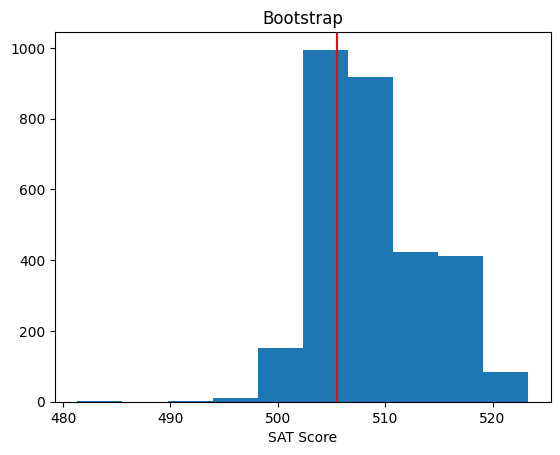

In [48]:
#plot boostrap with median SAT value in red
plt.hist(bootstrap_medians)
plt.xlabel('SAT Score')
plt.title('Bootstrap')
plt.axvline(x = sat_median, c = 'r')

In [44]:
#interval of confidence for SAT median
left = np.percentile(bootstrap_medians, 2.5)
right = np.percentile(bootstrap_medians, 97.5)
print("interval is from "+str(left)+" to "+str(right))

interval is from 499.83333333333337 to 519.3333333333334


In [ ]:
#with 95% confidence the SAT median score is between 500 and 519

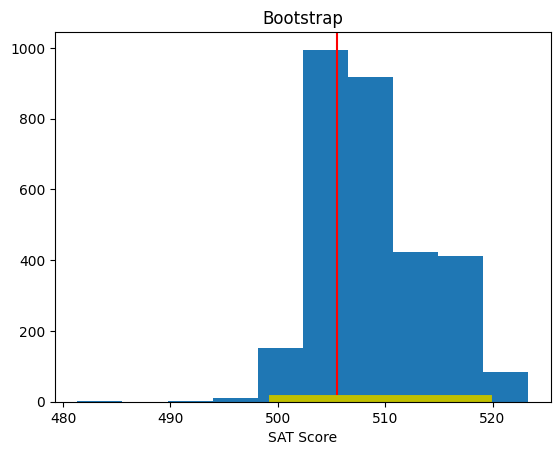

In [49]:
#plot bootstrap with interval
interval = np.array([left, right])
plt.hist(bootstrap_medians)
plt.axvline(x = sat_median, c = 'r')
plt.title('Bootstrap')
plt.xlabel('SAT Score')
plt.plot(interval, [0, 0], linewidth = 10, c = 'y')

# Graphs

Text(0.5, 1.0, 'SAT Score vs % High Needs')

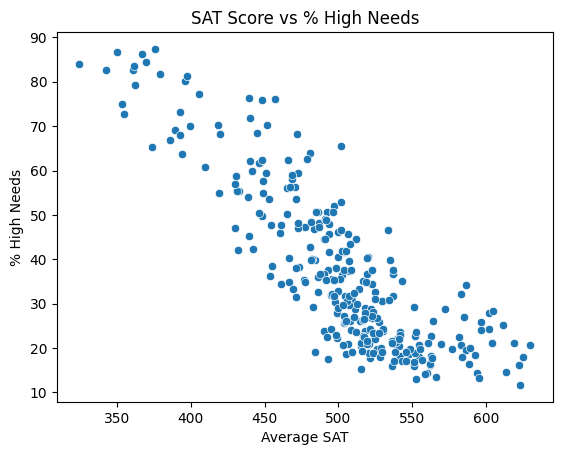

In [54]:
#plot SAT score vs % High Needs
sns.scatterplot(data = MAdfR, x = "Average SAT", y = "% High Needs")
plt.title('SAT Score vs % High Needs')

Text(0.5, 1.0, 'SAT Score vs % High Needs Students')

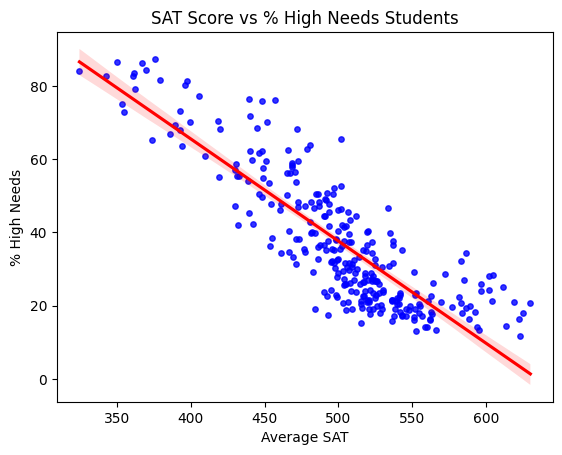

In [67]:
#plot SAT vs % High Needs with line of best fit
ax = sns.regplot(x = "Average SAT", y = "% High Needs", data = MAdfR, scatter_kws = {"color": "blue", 's':15},
            line_kws = {"color": "red"})
plt.title('SAT Score vs % High Needs Students')

Text(0.5, 1.0, '% Economically Disadvantaged vs % High Needs')

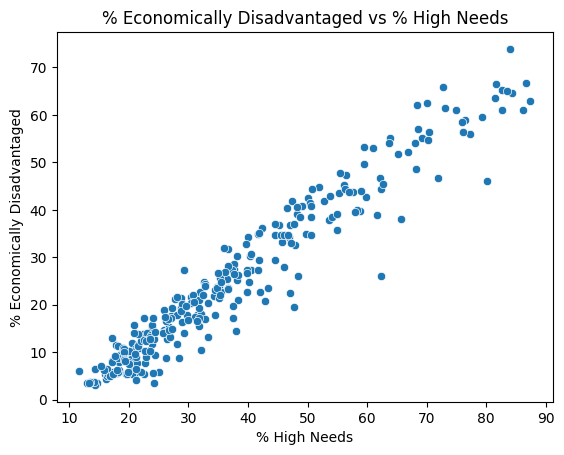

In [71]:
#plot % High needs and % Economically disadvantaged
sns.scatterplot(data = MAdfR, x = "% High Needs", y = "% Economically Disadvantaged")
plt.title('% Economically Disadvantaged vs % High Needs')

Text(0.5, 1.0, 'Average SAT vs School Accountability Percentile')

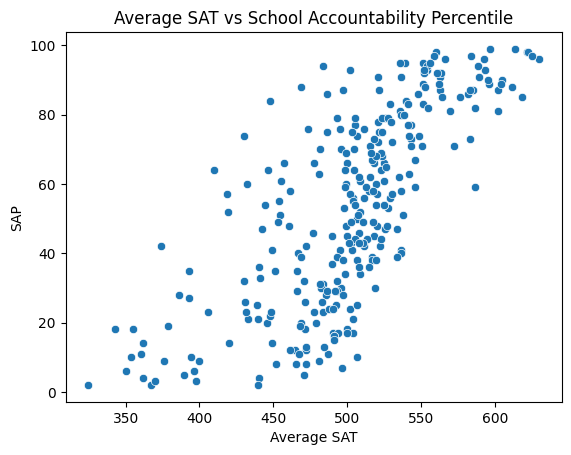

In [70]:
#plot SAT score vs School accountability percentile
sns.scatterplot(data = MAdfR, x = "Average SAT", y = "SAP")
plt.title('Average SAT vs School Accountability Percentile')

Text(0.5, 1.0, 'Average SAT vs % AP Score 3-5')

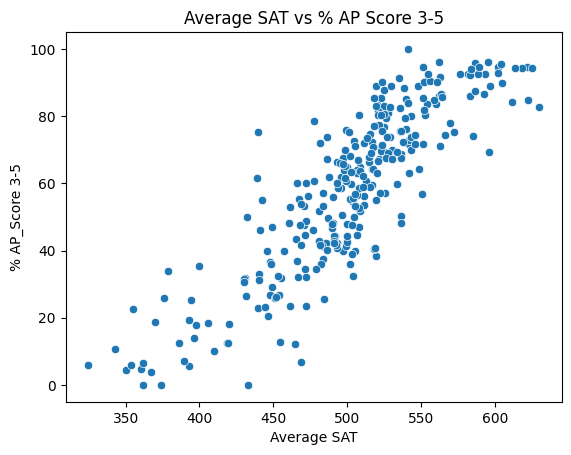

In [74]:
#plot SAT score and % of students who pass AP exams
sns.scatterplot(data = MAdfR, x = "Average SAT", y = "% AP_Score 3-5")
plt.title('Average SAT vs % AP Score 3-5')

Text(0.5, 1.0, '% High Needs vs MCAS Needs Improvement')

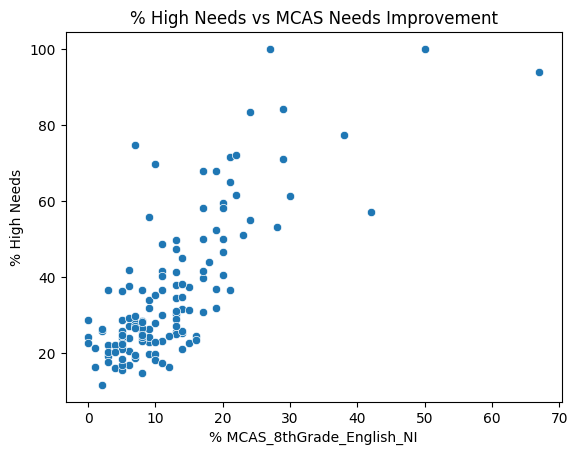

In [78]:
#plot % of students who scored needs improvement on the MCAS vs % High needs students
#MCAS is Massachusetts standarize testing system from 3rd to 10th grade
sns.scatterplot(data = MAdfAll, x = "% MCAS_8thGrade_English_NI", y = "% High Needs")
plt.title('% High Needs vs MCAS Needs Improvement')

# Map

In [87]:
#new dataset with just towns with a high needs student population 50% or more
df_Towns_HighNeeds = MAdfRNames1[['Town','% High Needs', 'Average SAT', 'School Name','% Attending College']]
condition_highNeedsTowns= df_Towns_HighNeeds['% High Needs'] > 50
df_HighNeedsMore50 = df_Towns_HighNeeds[condition_highNeedsTowns]

In [89]:
#dataset with just the town names
dataTowns = df_HighNeedsMore50['Town']
# Convert the dictionary into DataFrame
dfTowns = pd.DataFrame(dataTowns)
# Observe the result
dfTowns

,Town
115,Hyde Park
120,Boston
122,Hyde Park
127,Brighton
131,Charlestown
...,...
1805,Worcester
1822,Worcester
1826,Worcester
1831,Worcester


In [92]:
#add massachusetts to towns
dfTowns['Town'] = dfTowns['Town'].astype(str) + ' Massachusetts'

In [95]:
#function to find longitude and latitude of each town
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# declare an empty list to store
# latitude and longitude of values
# of city column
longitude = []
latitude = []

# function to find the coordinate
# of a given city
def findGeocode(city):

    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout
    try:

        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")

        return geolocator.geocode(city)

    except GeocoderTimedOut:

        return findGeocode(city)

# each value from city column
# will be fetched and sent to
# function find_geocode
for i in (dfTowns["Town"]):

    if findGeocode(i) != None:

        loc = findGeocode(i)

        # coordinates returned from
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)

    # if coordinate for a city not
    # found, insert "NaN" indicating
    # missing value
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [96]:
#now add this with long and lat column to dataframe
dfTowns["Longitude"] = longitude
dfTowns["Latitude"] = latitude

In [99]:
#add these columns to bigger dataset
dataHighNeeds = df_HighNeedsMore50[['% High Needs', 'Average SAT','School Name','% Attending College']]
# Convert the dictionary into DataFrame
dfHighNeeds = pd.DataFrame(dataHighNeeds)
df_HighNeeds_LongLat = pd.concat([dfTowns, dfHighNeeds], axis=1)
df_HighNeeds_LongLat

,Town,Longitude,Latitude,% High Needs,Average SAT,School Name,% Attending College
115,Hyde Park Massachusetts,-71.124496,42.255654,73.1,393.000000,Another Course To College,81.4
120,Boston Massachusetts,-71.060511,42.355433,55.3,433.000000,Boston Arts Academy,77.8
122,Hyde Park Massachusetts,-71.124496,42.255654,77.2,405.666667,Boston Community Leadership Academy,81.7
127,Brighton Massachusetts,-71.153386,42.349162,86.2,367.000000,Brighton High,66.2
131,Charlestown Massachusetts,-71.061996,42.377875,87.4,376.000000,Charlestown High,65.5
...,...,...,...,...,...,...,...
1805,Worcester Massachusetts,-71.801888,42.262562,58.9,468.333333,Doherty Memorial High,75.2
1822,Worcester Massachusetts,-71.801888,42.262562,81.4,397.666667,North High,54.4
1826,Worcester Massachusetts,-71.801888,42.262562,75.9,448.333333,South High Community,60.6
1831,Worcester Massachusetts,-71.801888,42.262562,68.5,444.666667,University Pk Campus School,72.4


In [101]:
#create a map with the towns that have a high needs student population of 50% or more
#also display other stats from the town
import plotly.express as px
import pandas as pd


color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_HighNeeds_LongLat,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Town",
                        hover_data=["Town", "School Name","Average SAT"],
                        color_continuous_scale=color_scale,
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Statistics

In [35]:
#averages
avgSAT = MAdfR['Average SAT'].mean()
print("Average SAT:")
print(avgSAT)
print()
avgSAP = MAdfR['SAP'].mean()
print("Average School Accountability Percentile:")
print(avgSAP)
print()
avgAP = MAdfR['% AP_Score 3-5'].mean()
print("Average AP exam pass rate:")
print(avgAP)
print()
avgGrad = MAdfR['% Graduated'].mean()
print("Average % Graduated:")
print(avgGrad)
print()
avgCol = MAdfR['% Attending College'].mean()
print("Average % Attending College:")
print(avgCol)
print()
avgMCAS = MAdfAll['% MCAS_8thGrade_English_NI'].mean()
print("Average MCAS % Needs Improvement from 8th grade:")
print(avgMCAS)
print()
avgMCAS2 = MAdfAll['% MCAS_3rdGrade_English_NI'].mean()
print("Average MCAS % Needs Improvement from 3rd grade:")
print(avgMCAS2)

Average SAT:
501.55022831050223

Average School Accountability Percentile:
53.15068493150685

Average AP exam pass rate:
58.17260273972603

Average % Graduated:
90.6541095890411

Average % Attending College:
77.988698630137

Average MCAS % Needs Improvement from 8th grade:
12.454545454545455

Average MCAS % Needs Improvement from 3rd grade:
32.604651162790695


In [36]:
#looking at high needs school with over 50% high needs
condition_highNeeds= MAdfAll['% High Needs'] > 50
df_HighNeeds = MAdfR[condition_highNeeds]
condition_highNeeds1= MAdfAll['% High Needs'] > 50
df_HighNeeds1 = MAdfAll[condition_highNeeds1]

<ipython-input-36-d5bdcb3dcf11>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_HighNeeds = MAdfR[condition_highNeeds]


In [37]:
#averages from schools with a student population of 50% or more
avgSATHN = df_HighNeeds['Average SAT'].mean()
print("Average SAT:")
print(avgSATHN)
print()
avgSAPHN = df_HighNeeds['SAP'].mean()
print("Average School Accountability Percentile:")
print(avgSAPHN)
print()
avgAPHN = df_HighNeeds['% AP_Score 3-5'].mean()
print("Average AP exam pass rate:")
print(avgAPHN)
print()
avgGradHN = df_HighNeeds['% Graduated'].mean()
print("Average % Graduated:")
print(avgGradHN)
print()
avgColHN = df_HighNeeds['% Attending College'].mean()
print("Average % Attending College:")
print(avgColHN)
print()
avgMCASHN = df_HighNeeds1['% MCAS_8thGrade_English_NI'].mean()
print("Average MCAS % Needs Improvement from 8th grade:")
print(avgMCASHN)
print()
avgMCAS2HN = df_HighNeeds1['% MCAS_3rdGrade_English_NI'].mean()
print("Average MCAS % Needs Improvement from 3rd grade:")
print(avgMCAS2HN)

Average SAT:
429.44444444444446

Average School Accountability Percentile:
25.181818181818183

Average AP exam pass rate:
28.013636363636362

Average % Graduated:
80.91666666666666

Average % Attending College:
69.94545454545452

Average MCAS % Needs Improvement from 8th grade:
25.4

Average MCAS % Needs Improvement from 3rd grade:
43.44642857142857


In [38]:
#differences bewteen averages
print("Difference in SAT scores between all schools and schools with 50% or more high needs students:")
print(avgSAT-avgSATHN)
print()
print("Difference in AP exam pass rate between all schools and schools with 50% or more high needs students:")
print(avgAP-avgAPHN)
print()
print("Difference in School Accountability Percentile between all schools and schools with 50% or more high needs students:")
print(avgSAP-avgSAPHN)
print()
print("Difference in % graduated between all schools and schools with 50% or more high needs students:")
print(avgGrad-avgGradHN)
print()
print("Difference in % Attending College between all schools and schools with 50% or more high needs students:")
print(avgCol-avgColHN)
print()
print("Difference in MCAS % needs improvement in 8th between all schools and schools with 50% or more high needs students:")
print(avgMCASHN-avgMCAS)
print()
print("Difference in MCAS % needs improvement in 3rd between all schools and schools with 50% or more high needs students:")
print(avgMCAS2HN-avgMCAS2)

Difference in SAT scores between all schools and schools with 50% or more high needs students:
72.10578386605778

Difference in AP exam pass rate between all schools and schools with 50% or more high needs students:
30.15896637608967

Difference in School Accountability Percentile between all schools and schools with 50% or more high needs students:
27.96886674968867

Difference in % graduated between all schools and schools with 50% or more high needs students:
9.737442922374441

Difference in % Attending College between all schools and schools with 50% or more high needs students:
8.04324408468247

Difference in MCAS % needs improvement in 8th between all schools and schools with 50% or more high needs students:
12.945454545454544

Difference in MCAS % needs improvement in 3rd between all schools and schools with 50% or more high needs students:
10.841777408637874


In [39]:
#number of school that scored above avg on SAT
print(sum(MAdfRAboveAvg['Above Average SAT']))

163


In [40]:
#percent of school that scored above avg on SAT
print((163/292)*100)

55.821917808219176


In [41]:
#percent of school more the 50% high needs
(66/292)*100

22.602739726027394

In [42]:
#number of schools with a high needs student population 50% or more that scored above avg on SAT
condition_highNeedsAbove= MAdfRAboveAvg['% High Needs'] > 50
df_HighNeedsAbove = MAdfRAboveAvg[condition_highNeedsAbove]
print(sum(df_HighNeedsAbove['Above Average SAT']))

2


In [43]:
#only 2 of the 66 schools with a high needs student population of 50% or more scored above average on SAT
#which is around 3%
print((2/66)*100)

3.0303030303030303


In [44]:
#99% of school that performed above avg on the SAT had a high needs student population of less than 50%
print(((163-2)/162)*100)

99.38271604938271


In [45]:
#https://raw.githubusercontent.com/Mia-Coutts/Data-Science-Portfolio-Class/main/MA%20Income.csv

In [53]:
#a quick look at income
import pandas as pd
#get income data from github
url_data2 = (r'https://raw.githubusercontent.com/Mia-Coutts/Data-Science-Portfolio-Class/main/MA%20Income.csv')
#define dataset
Incomedf = pd.read_csv(url_data2)

In [54]:
#clean data
colstocheck = Incomedf.columns
Incomedf[colstocheck] = Incomedf[colstocheck].replace({'\$':''}, regex = True)

In [55]:
#create dataset with income
MAdfRTInc = MAdfRT.copy()
import pandas as pd
left_merged = pd.merge(MAdfRTInc, Incomedf, left_on="Town", right_on="City/town", how="left")
MAdfwInc = pd.DataFrame(left_merged)

In [56]:
#more cleaning
MAdfwInc['Median annual household income'] = MAdfwInc['Median annual household income'].str.replace(',', '')
MAdfwInc['Median annual household income'] = pd.to_numeric(MAdfwInc['Median annual household income'], errors='coerce')
MAdfwInc = MAdfwInc.dropna()

In [61]:
#high needs student population 50% or more with income
condition_highNeeds= MAdfwInc['% High Needs'] > 50
df_HighNeedsInc = MAdfwInc[condition_highNeeds]

In [62]:
#difference in income between all schools and schools with a high needs student population 50% or ore
difcinc = MAdfwInc['Median annual household income'].mean()-df_HighNeedsInc['Median annual household income'].mean()
print(difcinc)

28738.370364140937


In [63]:
#pearson's correlation between income and SAT
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
corr, _ = pearsonr(MAdfwInc['Median annual household income'], MAdfwInc['Average SAT'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.643


Text(0.5, 1.0, 'SAT Score vs Income')

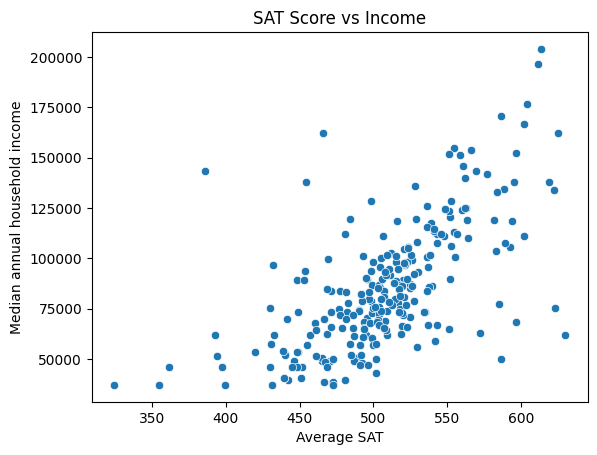

In [64]:
#plot income vs SAT
sns.scatterplot(data = MAdfwInc, x = "Average SAT", y = "Median annual household income")
plt.title('SAT Score vs Income')

In [65]:
#looking at income differences
#looking at high needs school with over 50% high needs
condition_highNeeds= MAdfwInc['% High Needs'] > 50
df_HighNeeds = MAdfwInc[condition_highNeeds]
#looking at above average SAT
condition_SAT= MAdfwInc['Average SAT'] > 500
df_AbvSAT = MAdfwInc[condition_SAT]
#looking at below average SAT
condition_SATlow= MAdfwInc['Average SAT'] < 500
df_lowSAT = MAdfwInc[condition_SATlow]

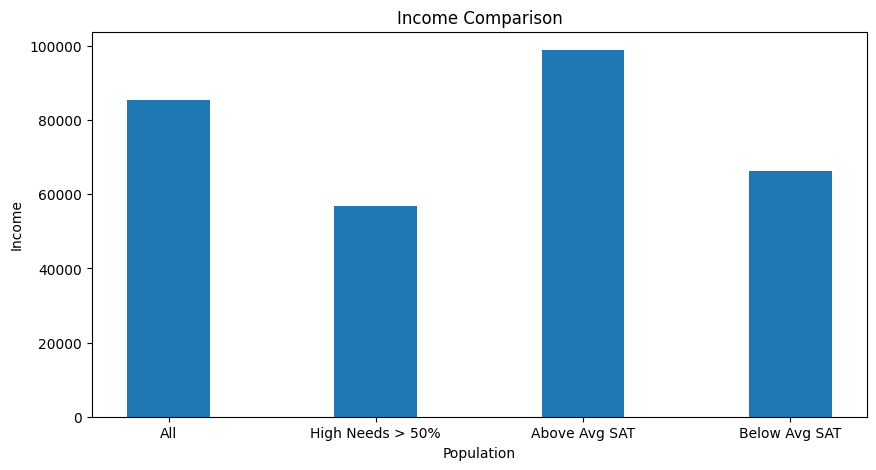

In [68]:
#plot income differences
# creating the dataset
data = {'All':MAdfwInc['Median annual household income'].mean(), 'High Needs > 50%':df_HighNeeds['Median annual household income'].mean(), 'Above Avg SAT': df_AbvSAT['Median annual household income'].mean(), 'Below Avg SAT': df_lowSAT['Median annual household income'].mean()}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values,
        width = 0.4)

plt.xlabel("Population")
plt.ylabel("Income")
plt.title("Income Comparison")
plt.show()